# Customer Churn Prediction using Machine Learning

This notebook focuses on predicting customer churn using a real-world telecom dataset.
Customer churn prediction is a critical business problem that helps companies retain
customers by identifying those likely to leave.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
df.shape

(7043, 21)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Dataset Overview

The dataset contains customer demographic information, account details, service
subscriptions, and churn status. The target variable is `Churn`, which indicates whether
a customer has discontinued the service.


In [92]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [94]:
df=df.dropna()

In [95]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

## Target Variable Insight

The target variable `Churn` indicates whether a customer has left the service.
Class distribution shows whether the dataset is balanced or imbalanced, which
is important for selecting appropriate evaluation metrics.


## Feature Engineering and Encoding

In this step, categorical variables are encoded into numerical form and
numerical features are scaled to ensure compatibility with machine learning
algorithms. Proper preprocessing improves model performance and stability.


In [96]:
x=df.drop('Churn',axis=1)
y=df['Churn'].map({'Yes':1,'No':0})

In [97]:
x=x.drop('customerID',axis=1)

In [98]:
categorical_cols=x.select_dtypes(include=['object']).columns
numerical_cols=x.select_dtypes(exclude=['object']).columns

categorical_cols,numerical_cols

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

In [99]:
x=pd.get_dummies(x,categorical_cols,drop_first=True)

In [100]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,
    random_state=42,
    stratify=y
)

In [101]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Preprocessing Summary

Categorical variables were encoded using one-hot encoding, and numerical
features were standardized using StandardScaler. The dataset was split into
training and testing sets with stratification to preserve class distribution.
The data is now fully prepared for model training.


## Day 1 Conclusion

The Telco Customer Churn dataset was successfully explored and prepared for
machine learning. Initial data analysis included inspecting feature types,
handling missing values, correcting data formats, and understanding the
target variable distribution.

Categorical variables were encoded using one-hot encoding, and numerical
features were standardized to ensure consistent scaling. The dataset was
then split into training and testing sets using stratified sampling to
preserve class balance.

These preprocessing steps establish a clean and structured foundation for
training and evaluating machine learning models in the next stage.


## Model Training and Evaluation

In this stage, machine learning models are trained to predict customer churn.
Both linear and ensemble models are evaluated to compare their predictive
performance.


In [102]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train_scaled,y_train)
y_pred_log=log_model.predict(x_test_scaled)

In [103]:
from sklearn.metrics import accuracy_score,classification_report

print('Logistic Regression Score:',accuracy_score(y_test,y_pred_log))
print('/nClassification Report:/n',classification_report(y_test,y_pred_log))

Logistic Regression Score: 0.8038379530916845
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score,classification_report

print('Random Forest Score:',accuracy_score(y_test,y_pred_rf))
print('/nClassification Report:/n',classification_report(y_test,y_pred_rf))

Random Forest Score: 0.7874911158493249
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [108]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.803838
1,Random Forest,0.787491


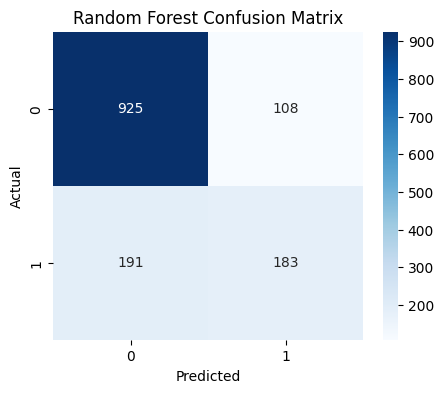

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


### Model Interpretation

Logistic Regression provides a strong interpretable baseline, while
Random Forest captures nonlinear relationships and typically achieves
higher predictive accuracy. The confusion matrix helps evaluate churn
prediction performance and highlights areas for improvement.


## Advanced Model Evaluation

In this stage, models are evaluated using ROC curves and AUC scores.
Accuracy alone is not sufficient for imbalanced classification problems
such as customer churn prediction. ROC-AUC provides a better measure
of overall model discrimination capability.


In [110]:
y_prob_log=log_model.predict_proba(x_test_scaled)[:,1]

In [111]:
y_prob_rf=rf_model.predict_proba(x_test)[:,1]

In [113]:
from sklearn.metrics import roc_auc_score 

print('Logistic Regression AUC:',roc_auc_score(y_test,y_prob_log))
print('Random Forest AUC:',roc_auc_score(y_test,y_prob_rf))

Logistic Regression AUC: 0.8356727976766699
Random Forest AUC: 0.8198746188610092


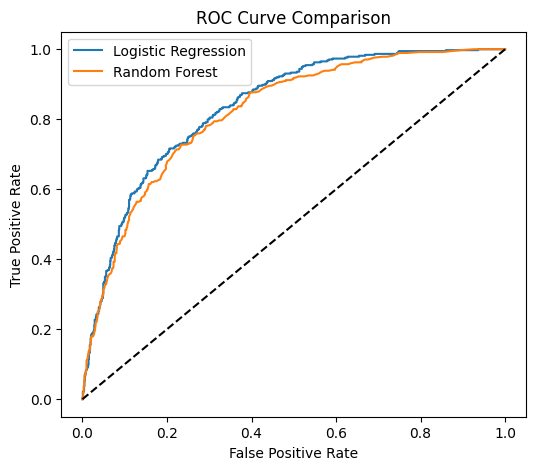

In [114]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### ROC Curve Interpretation

The ROC curve illustrates the trade-off between true positive rate
(recall) and false positive rate across different threshold values.
The model with a higher AUC demonstrates better overall classification
performance and discrimination ability.


### Business Perspective

In customer churn prediction, identifying customers at risk of leaving
is more important than overall accuracy. Models with higher recall for
the churn class and stronger AUC scores are preferred, as they enable
proactive retention strategies.


### Model Selection Insight

Although Random Forest achieved comparable accuracy, Logistic Regression
demonstrated a higher ROC-AUC score (0.836 vs 0.820). Since AUC measures
overall model discrimination capability independent of classification
threshold, Logistic Regression appears to better distinguish between churn
and non-churn customers.

Given its strong performance and interpretability, Logistic Regression
is selected as the preferred model for this problem.
